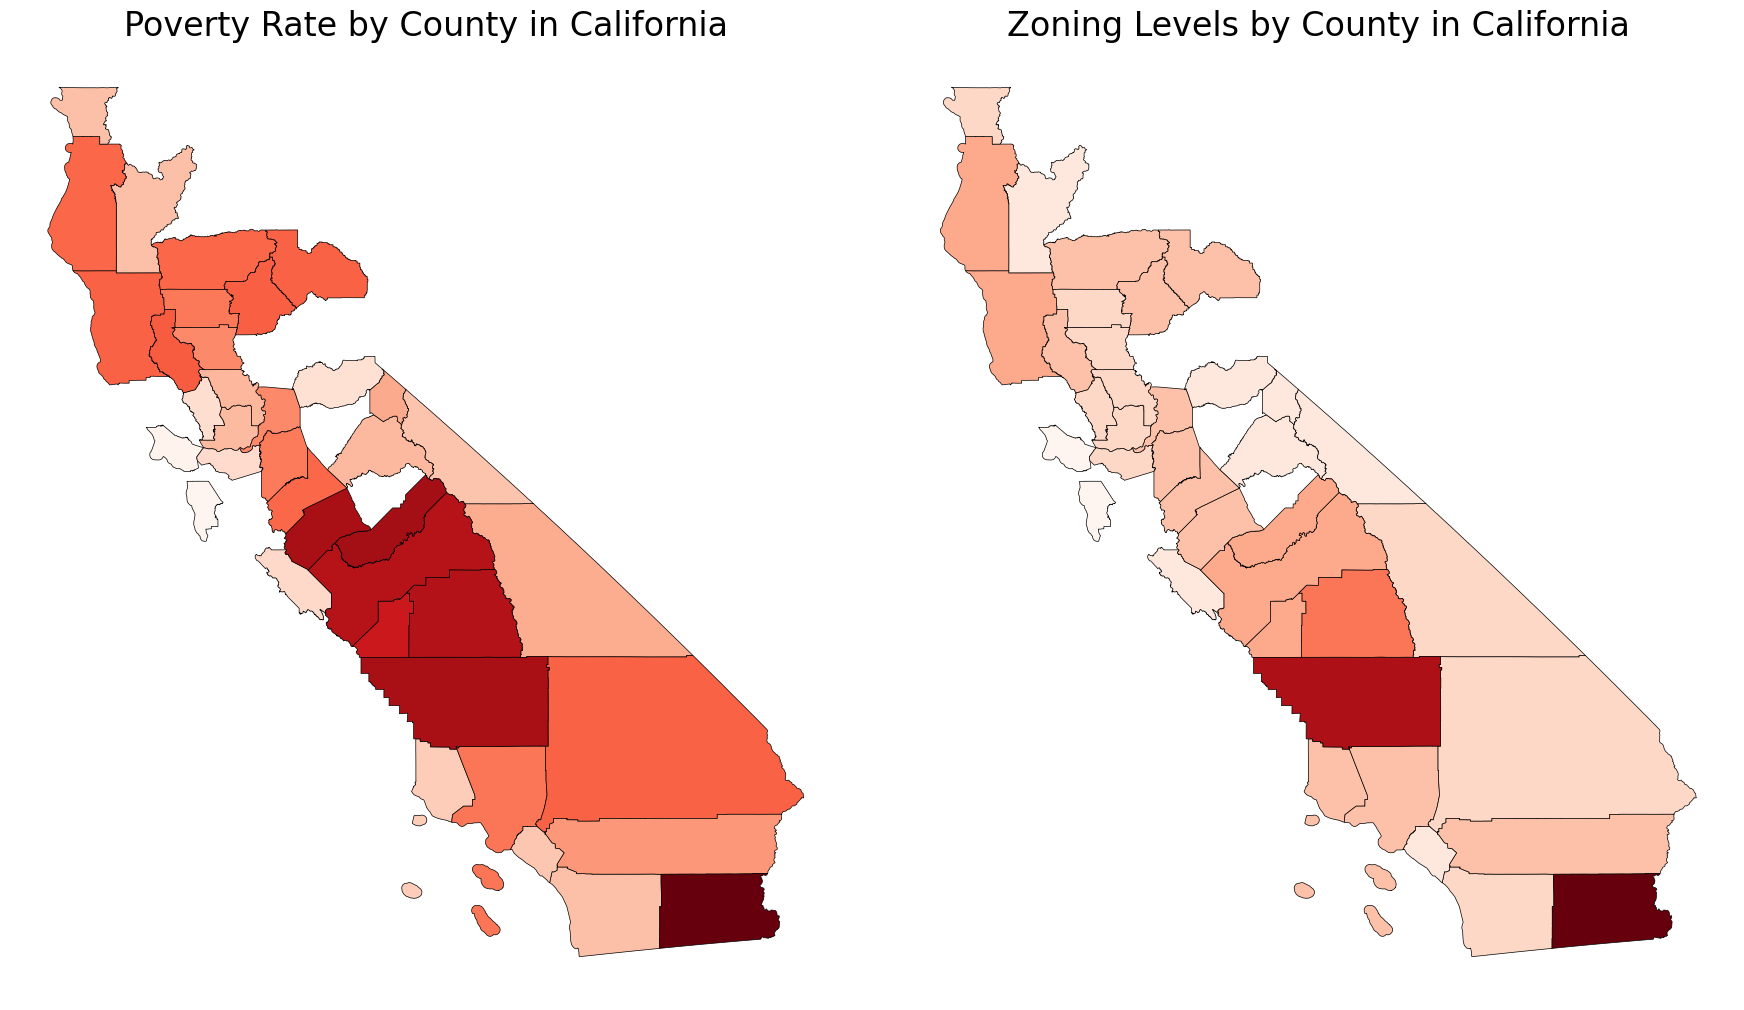

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

gdf = gpd.read_file("./tl_2023_us_county/tl_2023_us_county.shp")
california = gdf[gdf['STATEFP'] == '06'].copy()

data = pd.read_excel("/Users/eddie/Downloads/Zoning Laws.xlsx")

data['County'] = data['County'].str.strip().str.title()
california['NAME'] = california['NAME'].str.strip().str.title()

merged = california.merge(data, left_on='NAME', right_on='County')

fig, axes = plt.subplots(1, 2, figsize=(18, 10))

merged.plot(column='Poverty Rate', cmap='Reds', linewidth=0.5, edgecolor='black',
            legend=False, ax=axes[0])
axes[0].set_title("Poverty Rate by County in California", fontsize = 24)
axes[0].axis('off')

merged.plot(column='Zoning Laws', cmap='Reds', linewidth=0.5, edgecolor='black',
            legend=False, ax=axes[1])
axes[1].set_title("Zoning Levels by County in California", fontsize= 24)
axes[1].axis('off')

plt.tight_layout()
plt.show()
